<a href="https://colab.research.google.com/github/ajantony27/Projects/blob/main/FER_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
file_name = "images_train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
!pip install fastai

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import fastai
from PIL import Image
from fastai.vision import *
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')
# from fastai.utils import *
# show_install()

In [ ]:
path = Path('./')

In [ ]:
modified_train = pd.read_csv('modified_train.csv')

In [ ]:
modified_train.head()

,name,emotion
0,0,0
1,1,0
2,2,2
3,3,4
4,4,6


In [ ]:
src = ImageList.from_csv(path, 'modified_train.csv', folder='images_train', suffix='.jpg')

In [ ]:
src

ImageList (28709 items)
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
Path: .

In [ ]:
src = src.split_by_idx(range(40, 1000))#.label_from_df(label_delim=',')

In [ ]:
src = src.label_from_df(label_delim=',')

In [ ]:
tfms = get_transforms(max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [ ]:
data = (src.transform(tfms, size=48)
        .databunch().normalize(imagenet_stats))

In [ ]:
data

ImageDataBunch;

Train: LabelList (27749 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: MultiCategoryList
0,0,2,4,6
Path: .;

Valid: LabelList (960 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: MultiCategoryList
0,3,4,0,6
Path: .;

Test: None

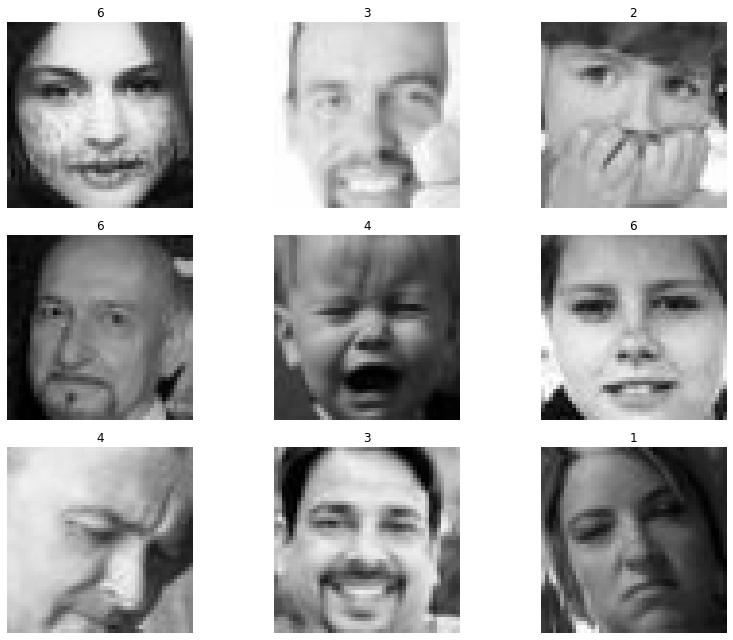

In [ ]:
data.show_batch(rows=3, figsize=(12,9))

In [ ]:
learn = create_cnn(data, models.resnet50, metrics=accuracy_thresh)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


### Training

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


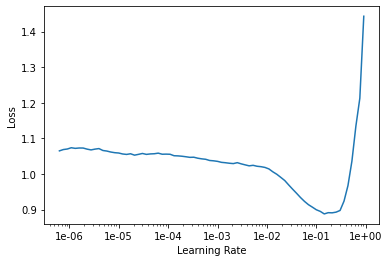

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(5e-1, 7e-2))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.429269,0.434790,0.826488,00:50
1,0.411303,7.748290,0.846577,00:50
2,0.382199,0.391338,0.851637,00:50
3,0.348054,0.337788,0.869643,00:50
4,0.320819,0.529765,0.872470,00:51


In [ ]:
learn.save('model-res50')

In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy_thresh,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


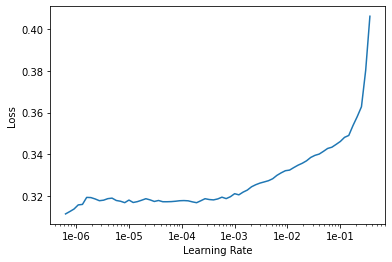

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-4, 1e-5))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.318416,0.504916,0.875000,00:56
1,0.311648,0.317978,0.874256,00:57
2,0.302282,0.309616,0.879018,00:57
3,0.302246,0.306839,0.879613,00:57
4,0.296742,0.305188,0.879613,00:57


In [ ]:
learn.save('model-res50')

### Evaluation

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
learn.load('model-res50')

Learner(data=ImageDataBunch;

Train: LabelList (27749 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: MultiCategoryList
0,0,2,4,6
Path: .;

Valid: LabelList (960 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: MultiCategoryList
0,3,4,0,6
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

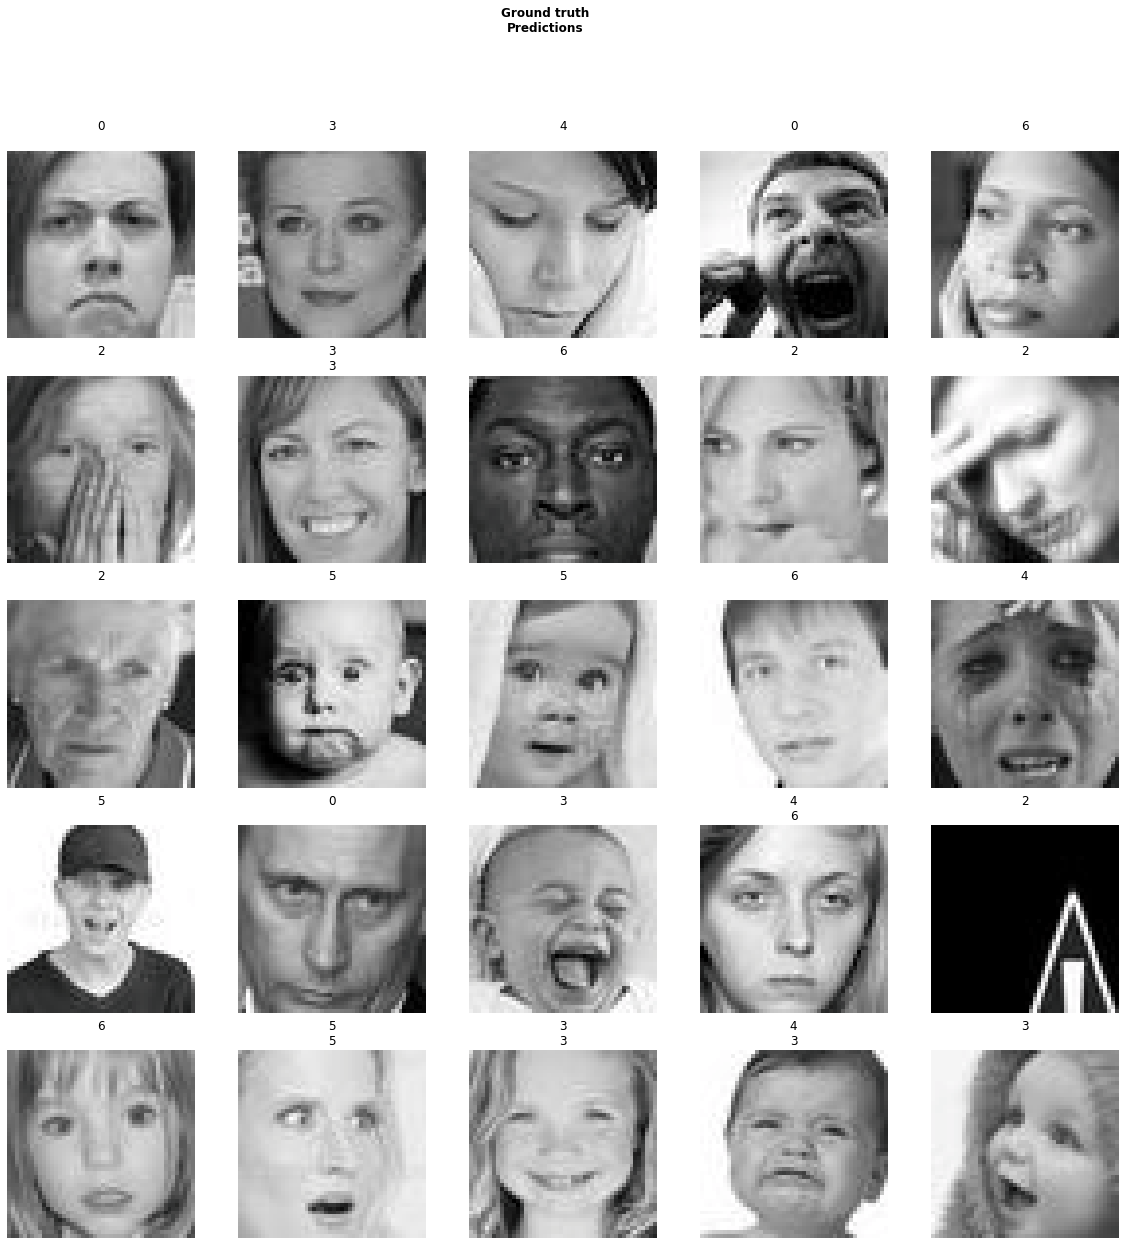

In [ ]:
learn.show_results()

In [ ]:
learn.export()

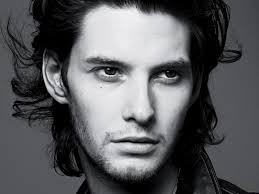

In [ ]:
img = open_image('/content/download (1).jpg')
img

In [ ]:
pred_class, pred_idx, outputs = learn.predict(img)
outputs
np.argmax(outputs)

tensor(6)